In [1]:
import torch, math
import matplotlib.pyplot as plt
from interpol import grid_pull, affine_grid

In [2]:
# generate a "square" phantom image
x = torch.zeros([64, 64])
x[16:48, 16:48] = 1

# build rotation matrix
rot = [[math.cos(math.pi/4), -math.sin(math.pi/4), 0],
       [math.sin(math.pi/4), math.cos(math.pi/4), 0],
       [0, 0, 1]]
center = [[1, 0, -32],
          [0, 1, -32],
          [0, 0, 1]]
rot = torch.as_tensor(rot, dtype=torch.float)
center = torch.as_tensor(center, dtype=torch.float)
full_affine = center.inverse() @ rot @ center

# build dense field of sampling coordinates
grid = affine_grid(full_affine, [64, 64])

# resample
y1 = grid_pull(x, grid, bound='mirror', interpolation=1)
y3 = grid_pull(x, grid, bound='mirror', interpolation=3, prefilter=True)
y5 = grid_pull(x, grid, bound='mirror', interpolation=5, prefilter=True)

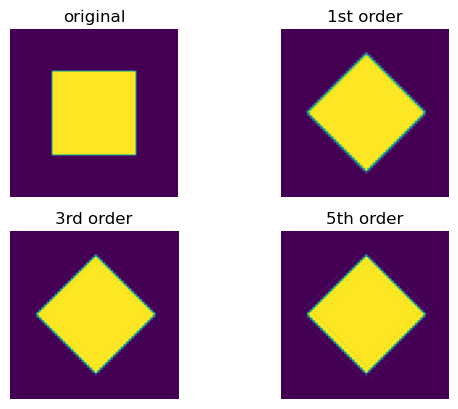

In [3]:
plt.subplot(2, 2, 1)
plt.imshow(x, vmin=0, vmax=1)
plt.axis('off')
plt.title('original')
plt.subplot(2, 2, 2)
plt.imshow(y1, vmin=0, vmax=1)
plt.axis('off')
plt.title('1st order')
plt.subplot(2, 2, 3)
plt.imshow(y3, vmin=0, vmax=1)
plt.axis('off')
plt.title('3rd order')
plt.subplot(2, 2, 4)
plt.imshow(y5, vmin=0, vmax=1)
plt.axis('off')
plt.title('5th order')
plt.show()